# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [405]:
#Import your libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Challenge 1 - Import and Describe the Dataset

#### In this challenge we will use the `austin_weather` data. 

#### First, import it into a data frame called `austin`. 

In [406]:
# Your code here
Austin = pd.read_csv('austin_weather.csv')

#### Next, describe the dataset you have loaded: 
- Look at the variables and their types
- Examine the descriptive statistics of the numeric variables 
- Look at the first five rows of all variables to evaluate the categorical variables as well

In [407]:
# Your code here
Austin.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [408]:
# Your code here
Austin.shape

(1319, 21)

In [409]:
# Your code here
Austin.describe()

,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


#### Given the information you have learned from examining the dataset, write down three insights about the data in a markdown cell below

#### Your Insights:

1. There are 21 variables in the dataset. 3 of them are numeric and the rest contain some text.

2. The average temperature in Austin ranged between around 70 degrees F and around 93 degrees F. The highest temperature observed during this period was 107 degrees F and the lowest was 19 degrees F.

3. When we look at the head function, we see that a lot of variables contain numeric data even though these columns are of object type. This means we might have to do some data cleansing.


#### Let's examine the DewPointAvgF variable by using the `unique()` function to list all unique values in this dataframe.

Describe what you find in a markdown cell below the code. What did you notice? What do you think made Pandas to treat this column as *object* instead of *int64*? 

In [410]:
# Your code here
Austin.nunique()

Date                          1319
TempHighF                       74
TempAvgF                        64
TempLowF                        61
DewPointHighF                   64
DewPointAvgF                    66
DewPointLowF                    73
HumidityHighPercent             58
HumidityAvgPercent              69
HumidityLowPercent              82
SeaLevelPressureHighInches     105
SeaLevelPressureAvgInches      101
SeaLevelPressureLowInches      105
VisibilityHighMiles              5
VisibilityAvgMiles              10
VisibilityLowMiles              12
WindHighMPH                     22
WindAvgMPH                      13
WindGustMPH                     37
PrecipitationSumInches         114
Events                           9
dtype: int64

In [411]:
Austin.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [412]:
Austin['DewPointAvgF'].head()

0    49
1    36
2    27
3    28
4    40
Name: DewPointAvgF, dtype: object

##### Your observation here
###### Had to use nunique() and dtypes(). 

The following is a list of columns misrepresented as `object`. Use this list to convert the columns to numeric using the `pandas.to_numeric` function in the next cell. If you encounter errors in converting strings to numeric values, you need to catch those errors and force the conversion by supplying `errors='coerce'` as an argument for `pandas.to_numeric`. Coercing will replace non-convertable elements with `NaN` which represents an undefined numeric value. This makes it possible for us to conveniently handle missing values in subsequent data processing.

*Hint: you may use a loop to change one column at a time but it is more efficient to use `apply`.*

In [413]:
wrong_type_columns = ['DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 
                      'HumidityAvgPercent', 'HumidityLowPercent', 'SeaLevelPressureHighInches', 
                      'SeaLevelPressureAvgInches' ,'SeaLevelPressureLowInches', 'VisibilityHighMiles',
                      'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 
                      'WindGustMPH', 'PrecipitationSumInches']

In [414]:
Austin[wrong_type_columns] = Austin[wrong_type_columns].apply(lambda x: pd.to_numeric(x, errors='coerce') if x.dtype == 'O' else x)

#### Check if your code has worked by printing the data types again. You should see only two `object` columns (`Date` and `Events`) now. All other columns should be `int64` or `float64`.

In [415]:
Austin.dtypes

Date                           object
TempHighF                       int64
TempAvgF                        int64
TempLowF                        int64
DewPointHighF                 float64
DewPointAvgF                  float64
DewPointLowF                  float64
HumidityHighPercent           float64
HumidityAvgPercent            float64
HumidityLowPercent            float64
SeaLevelPressureHighInches    float64
SeaLevelPressureAvgInches     float64
SeaLevelPressureLowInches     float64
VisibilityHighMiles           float64
VisibilityAvgMiles            float64
VisibilityLowMiles            float64
WindHighMPH                   float64
WindAvgMPH                    float64
WindGustMPH                   float64
PrecipitationSumInches        float64
Events                         object
dtype: object

In [416]:
Austin.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0.00,
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0.00,
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0.00,
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,NaN,


# Challenge 2 - Handle the Missing Data

#### Now that we have fixed the type mismatch, let's address the missing data.

By coercing the columns to numeric, we have created `NaN` for each cell containing characters. We should choose a strategy to address these missing data.

The first step is to examine how many rows contain missing data.

We check how much missing data we have by applying the `.isnull()` function to our dataset. To find the rows with missing data in any of its cells, we apply `.any(axis=1)` to the function. `austin.isnull().any(axis=1)` will return a column containing true if the row contains at least one missing value and false otherwise. Therefore we must subset our dataframe with this column. This will give us all rows with at least one missing value. 

#### In the next cell, identify all rows containing at least one missing value. Assign the dataframes with missing values to a variable called `missing_values`.

In [417]:
# Your code here
Austin.isna().sum()

Date                            0
TempHighF                       0
TempAvgF                        0
TempLowF                        0
DewPointHighF                   7
DewPointAvgF                    7
DewPointLowF                    7
HumidityHighPercent             2
HumidityAvgPercent              2
HumidityLowPercent              2
SeaLevelPressureHighInches      3
SeaLevelPressureAvgInches       3
SeaLevelPressureLowInches       3
VisibilityHighMiles            12
VisibilityAvgMiles             12
VisibilityLowMiles             12
WindHighMPH                     2
WindAvgMPH                      2
WindGustMPH                     4
PrecipitationSumInches        124
Events                          0
dtype: int64

There are multiple strategies to handle missing data. Below lists the most common ones data scientists use:

* Removing all rows or all columns containing missing data. This is the simplest strategy. It may work in some cases but not others.

* Filling all missing values with a placeholder value. 
    * For categorical data, `0`, `-1`, and `9999` are some commonly used placeholder values. 
    * For continuous data, some may opt to fill all missing data with the mean. This strategy is not optimal since it can increase the fit of the model.

* Filling the values using some algorithm. 

#### In our case, we will use a hybrid approach which is to first remove the data that contain most missing values then fill in the rest of the missing values with the *linear interpolation* algorithm.

#### Next, count the number of rows of `austin` and `missing_values`.

In [418]:
len(Austin)

1319

In [419]:
Austin.isnull().sum().sum()

204

#### Calculate the ratio of missing rows to total rows

In [420]:
total_rows = len(Austin)
rows_with_missing_values = Austin.isnull().any(axis=1).sum()
ratio_missing_rows = rows_with_missing_values / total_rows

As you can see, there is a large proportion of missing data (over 10%). Perhaps we should evaluate which columns have the most missing data and remove those columns. For the remaining columns, we will perform a linear approximation of the missing data.

We can find the number of missing rows in each column using the `.isna()` function. We then chain the `.sum` function to the `.isna()` function and find the number of missing rows per column

In [421]:
# Your code here
Austin.isna().sum()

Date                            0
TempHighF                       0
TempAvgF                        0
TempLowF                        0
DewPointHighF                   7
DewPointAvgF                    7
DewPointLowF                    7
HumidityHighPercent             2
HumidityAvgPercent              2
HumidityLowPercent              2
SeaLevelPressureHighInches      3
SeaLevelPressureAvgInches       3
SeaLevelPressureLowInches       3
VisibilityHighMiles            12
VisibilityAvgMiles             12
VisibilityLowMiles             12
WindHighMPH                     2
WindAvgMPH                      2
WindGustMPH                     4
PrecipitationSumInches        124
Events                          0
dtype: int64

#### As you can see from the output, the majority of missing data is in one column called `PrecipitationSumInches`. What's the number of missing values in this column in ratio to its total number of rows?

In [422]:
# Your code here
total_rows = len(Austin)
missing_values_precipitation = Austin['PrecipitationSumInches'].isnull().sum()
ratio_missing_precipitation = missing_values_precipitation / total_rows

Almost 10% data missing! Therefore, we prefer to remove this column instead of filling its missing values. 

#### Remove this column from `austin` using the `.drop()` function. Use the `inplace=True` argument.

*Hints:*

* By supplying `inplace=True` to `drop()`, the original dataframe object will be changed in place and the function will return `None`. In contrast, if you don't supply `inplace=True`, which is equivalent to supplying `inplace=False` because `False` is the default value, the original dataframe object will be kept and the function returns a copy of the transformed dataframe object. In the latter case, you'll have to assign the returned object back to your variable.

* Also, since you are dropping a column instead of a row, you'll need to supply `axis=1` to `drop()`.

[Reference for `pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [423]:
# Your code here 
Austin.drop(columns='PrecipitationSumInches', inplace=True)

# Print `austin` to confirm the column is indeed removed
Austin.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,


#### Next we will perform linear interpolation of the missing data.

This means that we will use a linear algorithm to estimate the missing data. Linear interpolation assumes that there is a straight line between the points and the missing point will fall on that line. This is a good enough approximation for weather related data. Weather related data is typically a time series. Therefore, we do not want to drop rows from our data if possible. It is prefereable to estimate the missing values rather than remove the rows. However, if you have data from a single point in time, perhaps a better solution would be to remove the rows. 

If you would like to read more about linear interpolation, you can do so [here](https://en.wikipedia.org/wiki/Linear_interpolation).

In the following cell, use the `.interpolate()` function on the entire dataframe. This time pass the `inplace=False` argument to the function and assign the interpolated dataframe to a new variable called `austin_fixed` so that we can compare with `austin`.

In [424]:
# Your code here
threshold = 0.5 
Austin_fixed = Austin.dropna(thresh=int((1-threshold)*len(Austin.columns)), axis=0)
Austin_fixed = Austin_fixed.interpolate(method='linear', axis=0)


C:\Users\julyj\AppData\Local\Temp\ipykernel_14788\2434206715.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  Austin_fixed = Austin_fixed.interpolate(method='linear', axis=0)


#### Check to make sure `austin_fixed` contains no missing data. Also check `austin` - it still contains missing data.

In [425]:
# Your code here
Austin_fixed.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
Events                        0
dtype: int64

In [426]:
Austin.isnull().sum()

Date                           0
TempHighF                      0
TempAvgF                       0
TempLowF                       0
DewPointHighF                  7
DewPointAvgF                   7
DewPointLowF                   7
HumidityHighPercent            2
HumidityAvgPercent             2
HumidityLowPercent             2
SeaLevelPressureHighInches     3
SeaLevelPressureAvgInches      3
SeaLevelPressureLowInches      3
VisibilityHighMiles           12
VisibilityAvgMiles            12
VisibilityLowMiles            12
WindHighMPH                    2
WindAvgMPH                     2
WindGustMPH                    4
Events                         0
dtype: int64

# Challenge 3 - Processing the `Events` Column

#### Our dataframe contains one true text column - the Events column. We should evaluate this column to determine how to process it.

Use the `value_counts()` function to evaluate the contents of this column

In [427]:
# Your code here:
Austin['Events'].value_counts()

Events
                             903
Rain                         192
Rain , Thunderstorm          137
Fog , Rain , Thunderstorm     33
Fog                           21
Thunderstorm                  17
Fog , Rain                    14
Rain , Snow                    1
Fog , Thunderstorm             1
Name: count, dtype: int64

In [428]:
Austin_fixed.Events.unique()

array(['Rain , Thunderstorm', ' ', 'Rain', 'Fog', 'Rain , Snow',
       'Fog , Rain', 'Thunderstorm', 'Fog , Rain , Thunderstorm',
       'Fog , Thunderstorm'], dtype=object)

In [429]:
Austin_fixed.Events.nunique()

9

In [430]:
Austin_fixed.Events.describe()

count     1317
unique       9
top           
freq       901
Name: Events, dtype: object

Reading the values of `Events` and reflecting what those values mean in the context of data, you realize this column indicates what weather events had happened in a particular day.

#### What is the largest number of events happened in a single day? Enter your answer in the next cell.

In [431]:
# Your answer:
Austin['NumEvents'] = Austin['Events'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
max_events = Austin['NumEvents'].max()
print(f"The largest number of events happened in a single day: {max_events}")

The largest number of events happened in a single day: 3


#### We want to transform the string-type `Events` values to the numbers. This will allow us to apply machine learning algorithms easily.

How? We will create a new column for each type of events (i.e. *Rain*, *Snow*, *Fog*, *Thunderstorm*. In each column, we use `1` to indicate if the corresponding event happened in that day and use `0` otherwise.

Below we provide you a list of all event types. Loop the list and create a dummy column with `0` values for each event in `austin_fixed`. To create a new dummy column with `0` values, simply use `austin_fixed[event] = 0`.

In [432]:
event_list = ['Snow', 'Fog', 'Rain', 'Thunderstorm']

# Your code here
for event in event_list:
    Austin_fixed[event] = 0


# Print your new dataframe to check whether new columns have been created:

Austin_fixed.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",0,0,0,0
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,10.0,5.0,16.0,6.0,25.0,,0,0,0,0
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,10.0,10.0,8.0,3.0,12.0,,0,0,0,0
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,10.0,7.0,12.0,4.0,20.0,,0,0,0,0
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,10.0,7.0,10.0,2.0,16.0,,0,0,0,0


#### Next, populate the actual values in the dummy columns of  `austin_fixed`.

You will check the *Events* column. If its string value contains `Rain`, then the *Rain* column should be `1`. The same for `Snow`, `Fog`, and `Thunderstorm`.

*Hints:*

* Use [`pandas.Series.str.contains()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html) to create the value series of each new column.

* What if the values you populated are booleans instead of numbers? You can cast the boolean values to numbers by using `.astype(int)`. For instance, `pd.Series([True, True, False]).astype(int)` will return a new series with values of `[1, 1, 0]`.

In [433]:
# Your code here
Austin_fixed['Rain'] = Austin_fixed['Events'].str.contains('Rain').astype(int)
Austin_fixed['Snow'] = Austin_fixed['Events'].str.contains('Snow').astype(int)
Austin_fixed['Fog'] = Austin_fixed['Events'].str.contains('Fog').astype(int)
Austin_fixed['Thunderstorm'] = Austin_fixed['Events'].str.contains('Thunderstorm').astype(int)

#### Print out `austin_fixed` to check if the event columns are populated with the intended values

In [434]:
# Your code here
Austin_fixed.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",0,0,1,1
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,10.0,5.0,16.0,6.0,25.0,,0,0,0,0
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,10.0,10.0,8.0,3.0,12.0,,0,0,0,0
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,10.0,7.0,12.0,4.0,20.0,,0,0,0,0
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,10.0,7.0,10.0,2.0,16.0,,0,0,0,0


#### If your code worked correctly, now we can drop the `Events` column as we don't need it any more.

In [435]:
# Your code here
Austin_fixed.drop('Events', axis=1, inplace=True)

# Challenge 4 - Processing The `Date` Column

The `Date` column is another non-numeric field in our dataset. A value in that field looks like `'2014-01-06'` which consists of the year, month, and day connected with hyphens. One way to convert the date string to numerical is using a similar approach as we used for `Events`, namely splitting the column into numerical `Year`, `Month`, and `Day` columns. In this challenge we'll show you another way which is to use the Python `datetime` library's `toordinal()` function. Depending on what actual machine learning analysis you will conduct, each approach has its pros and cons. Our goal today is to practice data preparation so we'll skip the discussion here.

Here you can find the [reference](https://docs.python.org/3/library/datetime.html) and [example](https://stackoverflow.com/questions/39846918/convert-date-to-ordinal-python) for `toordinal`. The basic process is to first convert the string to a `datetime` object using `datetime.datetime.strptime`, then convert the `datetime` object to numerical using `toordinal`.

#### In the cell below, convert the `Date` column values from string to numeric values using `toordinal()`.

In [436]:
import datetime
Austin_fixed['Date'] = Austin_fixed['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').toordinal())


#### Print `austin_fixed` to check your `Date` column.

In [437]:
Austin_fixed.head(5)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Snow,Fog,Rain,Thunderstorm
0,735223,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,10.0,7.0,2.0,20.0,4.0,31.0,0,0,1,1
1,735224,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,10.0,10.0,5.0,16.0,6.0,25.0,0,0,0,0
2,735225,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,10.0,10.0,10.0,8.0,3.0,12.0,0,0,0,0
3,735226,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,10.0,10.0,7.0,12.0,4.0,20.0,0,0,0,0
4,735227,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,10.0,10.0,7.0,10.0,2.0,16.0,0,0,0,0


# Challenge 5 - Sampling and Holdout Sets

#### Now that we have processed the data for machine learning, we will separate the data to test and training sets.

We first train the model using only the training set. We check our metrics on the training set. We then apply the model to the test set and check our metrics on the test set as well. If the metrics are significantly more optimal on the training set, then we know we have overfit our model. We will need to revise our model to ensure it will be more applicable to data outside the test set.

#### In the next cells we will separate the data into a training set and a test set using the `train_test_split()` function in scikit-learn.

When using `scikit-learn` for machine learning, we first separate the data to predictor and response variables. This is the standard way of passing datasets into a model in `scikit-learn`. The `scikit-learn` will then find out whether the predictors and responses fit the model.

In the next cell, assign the `TempAvgF` column to `y` and the remaining columns to `X`. Your `X` should be a subset of `austin_fixed` containing the following columns: 

```['Date',
 'TempHighF',
 'TempLowF',
 'DewPointHighF',
 'DewPointAvgF',
 'DewPointLowF',
 'HumidityHighPercent',
 'HumidityAvgPercent',
 'HumidityLowPercent',
 'SeaLevelPressureHighInches',
 'SeaLevelPressureAvgInches',
 'SeaLevelPressureLowInches',
 'VisibilityHighMiles',
 'VisibilityAvgMiles',
 'VisibilityLowMiles',
 'WindHighMPH',
 'WindAvgMPH',
 'WindGustMPH',
 'Snow',
 'Fog',
 'Rain',
 'Thunderstorm']```
 
 Your `y` should be a subset of `austin_fixed` containing one column `TempAvgF`.

In [438]:
X = Austin_fixed[['TempHighF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF', 'DewPointLowF',
                  'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent',
                  'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
                  'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
                  'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'Snow', 'Fog', 'Rain', 'Thunderstorm']]

y = Austin_fixed['TempAvgF']


print("X (predictor variables):\n", X.head())
print("\ny (response variable):\n", y.head())


X (predictor variables):
    TempHighF  TempLowF  DewPointHighF  DewPointAvgF  DewPointLowF  \
0         74        45           67.0          49.0          43.0   
1         56        39           43.0          36.0          28.0   
2         58        32           31.0          27.0          23.0   
3         61        31           36.0          28.0          21.0   
4         58        41           44.0          40.0          36.0   

   HumidityHighPercent  HumidityAvgPercent  HumidityLowPercent  \
0                 93.0                75.0                57.0   
1                 93.0                68.0                43.0   
2                 76.0                52.0                27.0   
3                 89.0                56.0                22.0   
4                 86.0                71.0                56.0   

   SeaLevelPressureHighInches  SeaLevelPressureAvgInches  ...  \
0                       29.86                      29.68  ...   
1                       30.41   

In the next cell, import `train_test_split` from `sklearn.model_selection`

In [439]:
#Your code here:
from sklearn.model_selection import train_test_split

Now that we have split the data to predictor and response variables and imported the `train_test_split()` function, split `X` and `y` into `X_train`, `X_test`, `y_train`, and `y_test`. 80% of the data should be in the training set and 20% in the test set. `train_test_split()` reference can be accessed [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).


Enter your code in the cell below:

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1053, 21)
X_test shape: (264, 21)
y_train shape: (1053,)
y_test shape: (264,)


#### Congratulations! Now you have finished the preparation of the dataset!

In [441]:
austin_reg = Austin_fixed.copy()

In [442]:
import pandas as pd
import numpy as np

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [443]:
austin_reg.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Snow,Fog,Rain,Thunderstorm
0,735223,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,10.0,7.0,2.0,20.0,4.0,31.0,0,0,1,1
1,735224,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,10.0,10.0,5.0,16.0,6.0,25.0,0,0,0,0
2,735225,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,10.0,10.0,10.0,8.0,3.0,12.0,0,0,0,0
3,735226,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,10.0,10.0,7.0,12.0,4.0,20.0,0,0,0,0
4,735227,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,10.0,10.0,7.0,10.0,2.0,16.0,0,0,0,0


In [444]:
austin_reg.shape

(1317, 23)

In [445]:
austin_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1317 entries, 0 to 1318
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1317 non-null   int64  
 1   TempHighF                   1317 non-null   int64  
 2   TempAvgF                    1317 non-null   int64  
 3   TempLowF                    1317 non-null   int64  
 4   DewPointHighF               1317 non-null   float64
 5   DewPointAvgF                1317 non-null   float64
 6   DewPointLowF                1317 non-null   float64
 7   HumidityHighPercent         1317 non-null   float64
 8   HumidityAvgPercent          1317 non-null   float64
 9   HumidityLowPercent          1317 non-null   float64
 10  SeaLevelPressureHighInches  1317 non-null   float64
 11  SeaLevelPressureAvgInches   1317 non-null   float64
 12  SeaLevelPressureLowInches   1317 non-null   float64
 13  VisibilityHighMiles         1317 non-n

In [446]:
austin_reg.dtypes

Date                            int64
TempHighF                       int64
TempAvgF                        int64
TempLowF                        int64
DewPointHighF                 float64
DewPointAvgF                  float64
DewPointLowF                  float64
HumidityHighPercent           float64
HumidityAvgPercent            float64
HumidityLowPercent            float64
SeaLevelPressureHighInches    float64
SeaLevelPressureAvgInches     float64
SeaLevelPressureLowInches     float64
VisibilityHighMiles           float64
VisibilityAvgMiles            float64
VisibilityLowMiles            float64
WindHighMPH                   float64
WindAvgMPH                    float64
WindGustMPH                   float64
Snow                            int32
Fog                             int32
Rain                            int32
Thunderstorm                    int32
dtype: object

In [447]:
austin_reg.nunique().sort_values(ascending=False)

Date                          1317
SeaLevelPressureHighInches     105
SeaLevelPressureLowInches      105
SeaLevelPressureAvgInches      101
HumidityLowPercent              81
DewPointLowF                    76
TempHighF                       74
DewPointAvgF                    70
HumidityAvgPercent              69
DewPointHighF                   67
TempAvgF                        64
TempLowF                        61
HumidityHighPercent             58
WindGustMPH                     37
WindHighMPH                     21
VisibilityLowMiles              15
VisibilityAvgMiles              13
WindAvgMPH                      12
VisibilityHighMiles              4
Snow                             2
Fog                              2
Rain                             2
Thunderstorm                     2
dtype: int64

In [448]:
austin_reg.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,1317.0,735882.094153,381.188469,735223.00,735552.00,735883.00,736212.00,736541.00
TempHighF,1317.0,80.827639,14.750093,32.00,72.00,83.00,92.00,107.00
TempAvgF,1317.0,70.614275,14.037294,29.00,62.00,73.00,83.00,93.00
TempLowF,1317.0,59.880790,14.189991,19.00,49.00,62.00,73.00,81.00
DewPointHighF,1317.0,61.557327,13.577866,13.00,53.00,66.00,73.00,80.00
DewPointAvgF,1317.0,56.685270,14.862557,8.00,46.00,61.00,69.00,76.00
DewPointLowF,1317.0,50.994685,16.187028,2.00,38.00,56.00,65.00,75.00
HumidityHighPercent,1317.0,87.868261,11.035085,37.00,85.00,90.00,94.00,100.00
HumidityAvgPercent,1317.0,66.679195,12.465414,27.00,59.00,67.00,74.00,97.00
HumidityLowPercent,1317.0,44.977980,16.970750,10.00,33.00,44.00,55.00,93.00


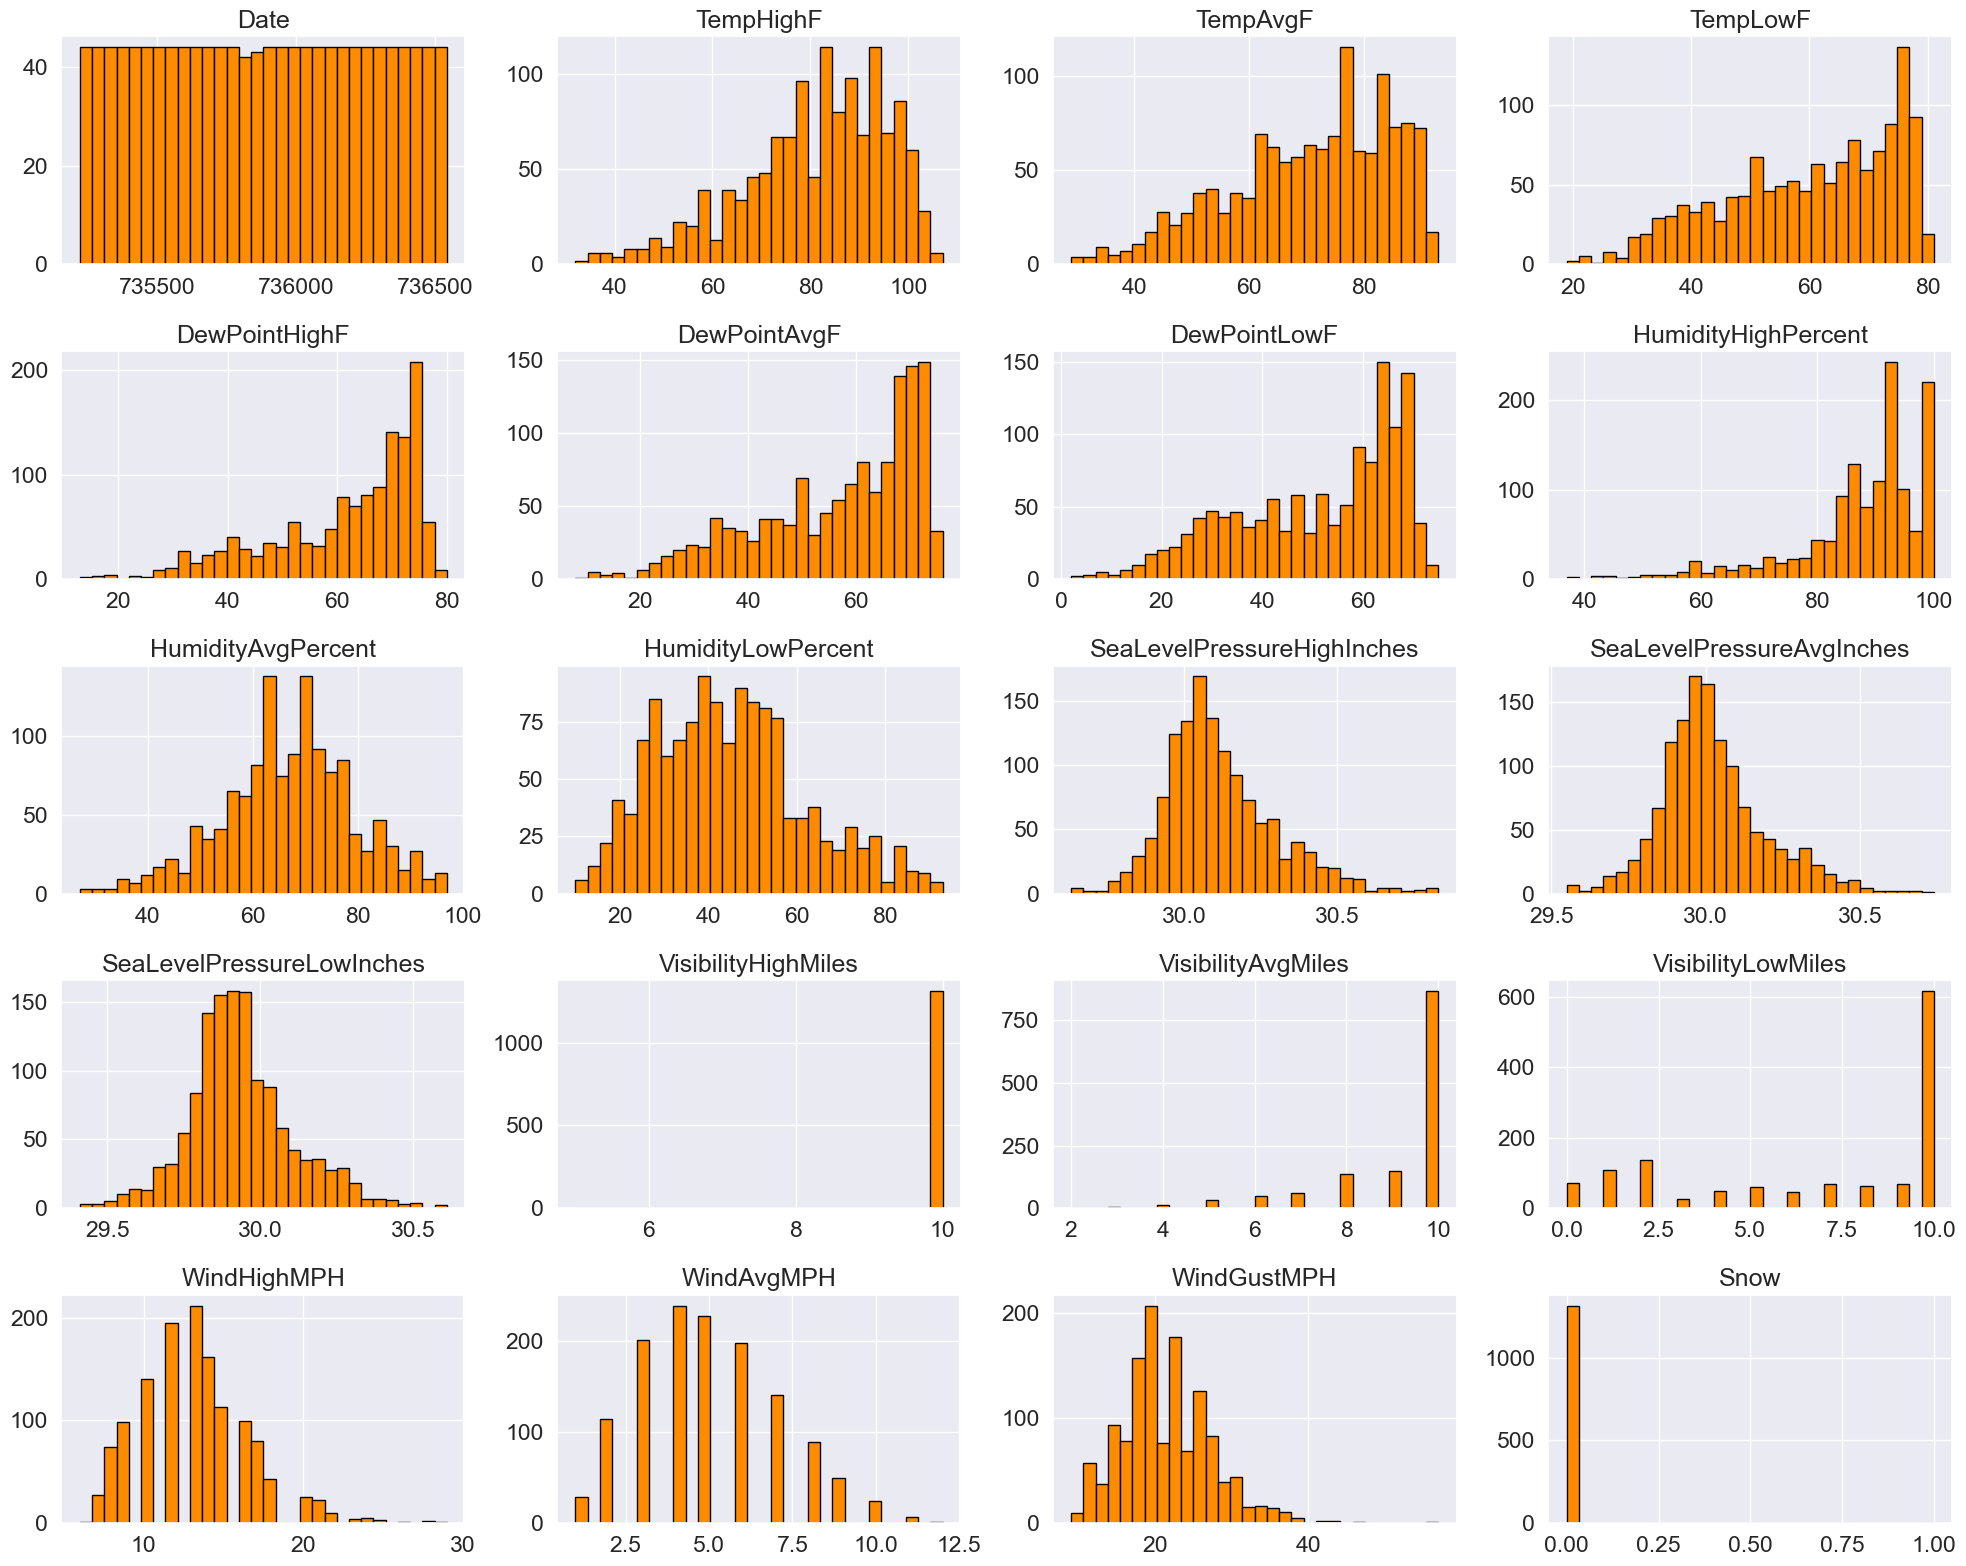

In [449]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(austin_reg.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(austin_reg.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(austin_reg.columns[i])

plt.tight_layout()
plt.show()

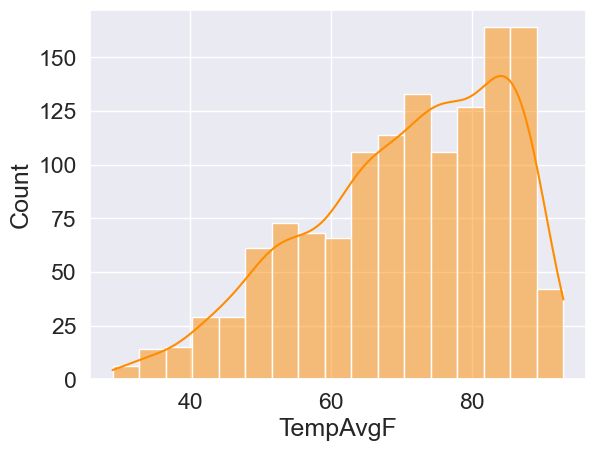

In [450]:
sns.histplot(austin_reg["TempAvgF"], color=color, kde=True);

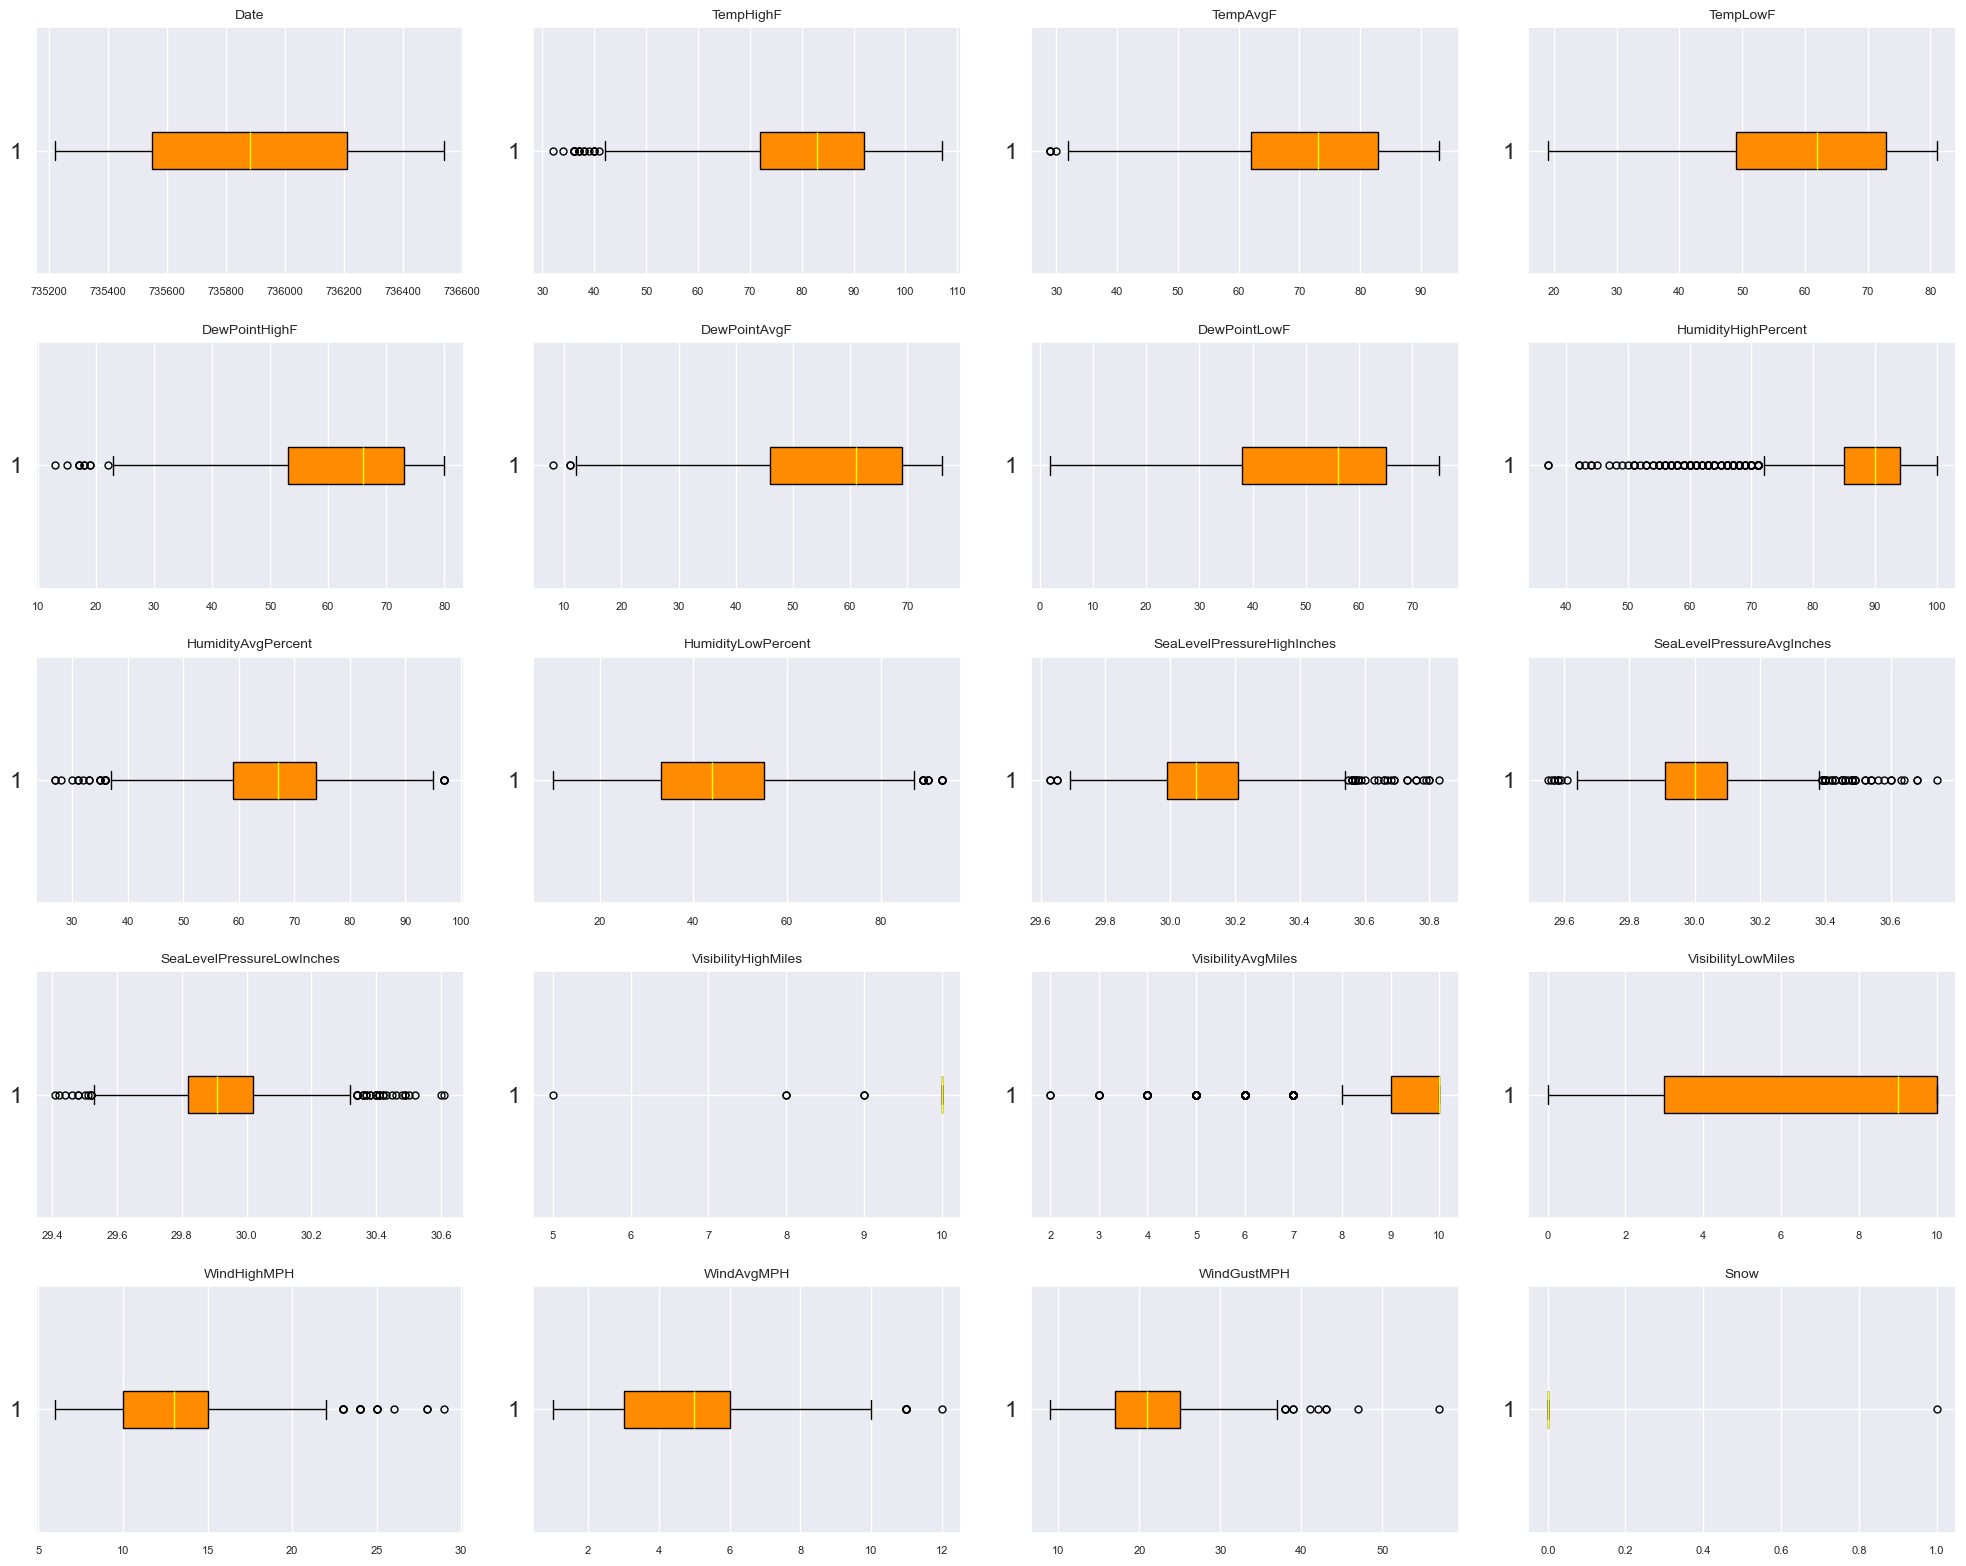

In [451]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(austin_reg.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(austin_reg.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(austin_reg.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [452]:
austin_reg.corrwith(austin_reg["TempAvgF"]).sort_values(ascending=False)

TempAvgF                      1.000000
TempHighF                     0.970599
TempLowF                      0.968579
DewPointAvgF                  0.895627
DewPointHighF                 0.881814
DewPointLowF                  0.864514
HumidityHighPercent           0.214818
VisibilityAvgMiles            0.209799
Date                          0.192518
VisibilityLowMiles            0.112200
Thunderstorm                  0.094130
VisibilityHighMiles           0.090989
WindAvgMPH                    0.039365
WindGustMPH                   0.034699
HumidityAvgPercent            0.033017
WindHighMPH                   0.022184
Fog                          -0.032636
Snow                         -0.056213
HumidityLowPercent           -0.091011
Rain                         -0.104820
SeaLevelPressureLowInches    -0.538001
SeaLevelPressureAvgInches    -0.624098
SeaLevelPressureHighInches   -0.695771
dtype: float64

In [453]:
num_corr = round(austin_reg.corr(), 2)

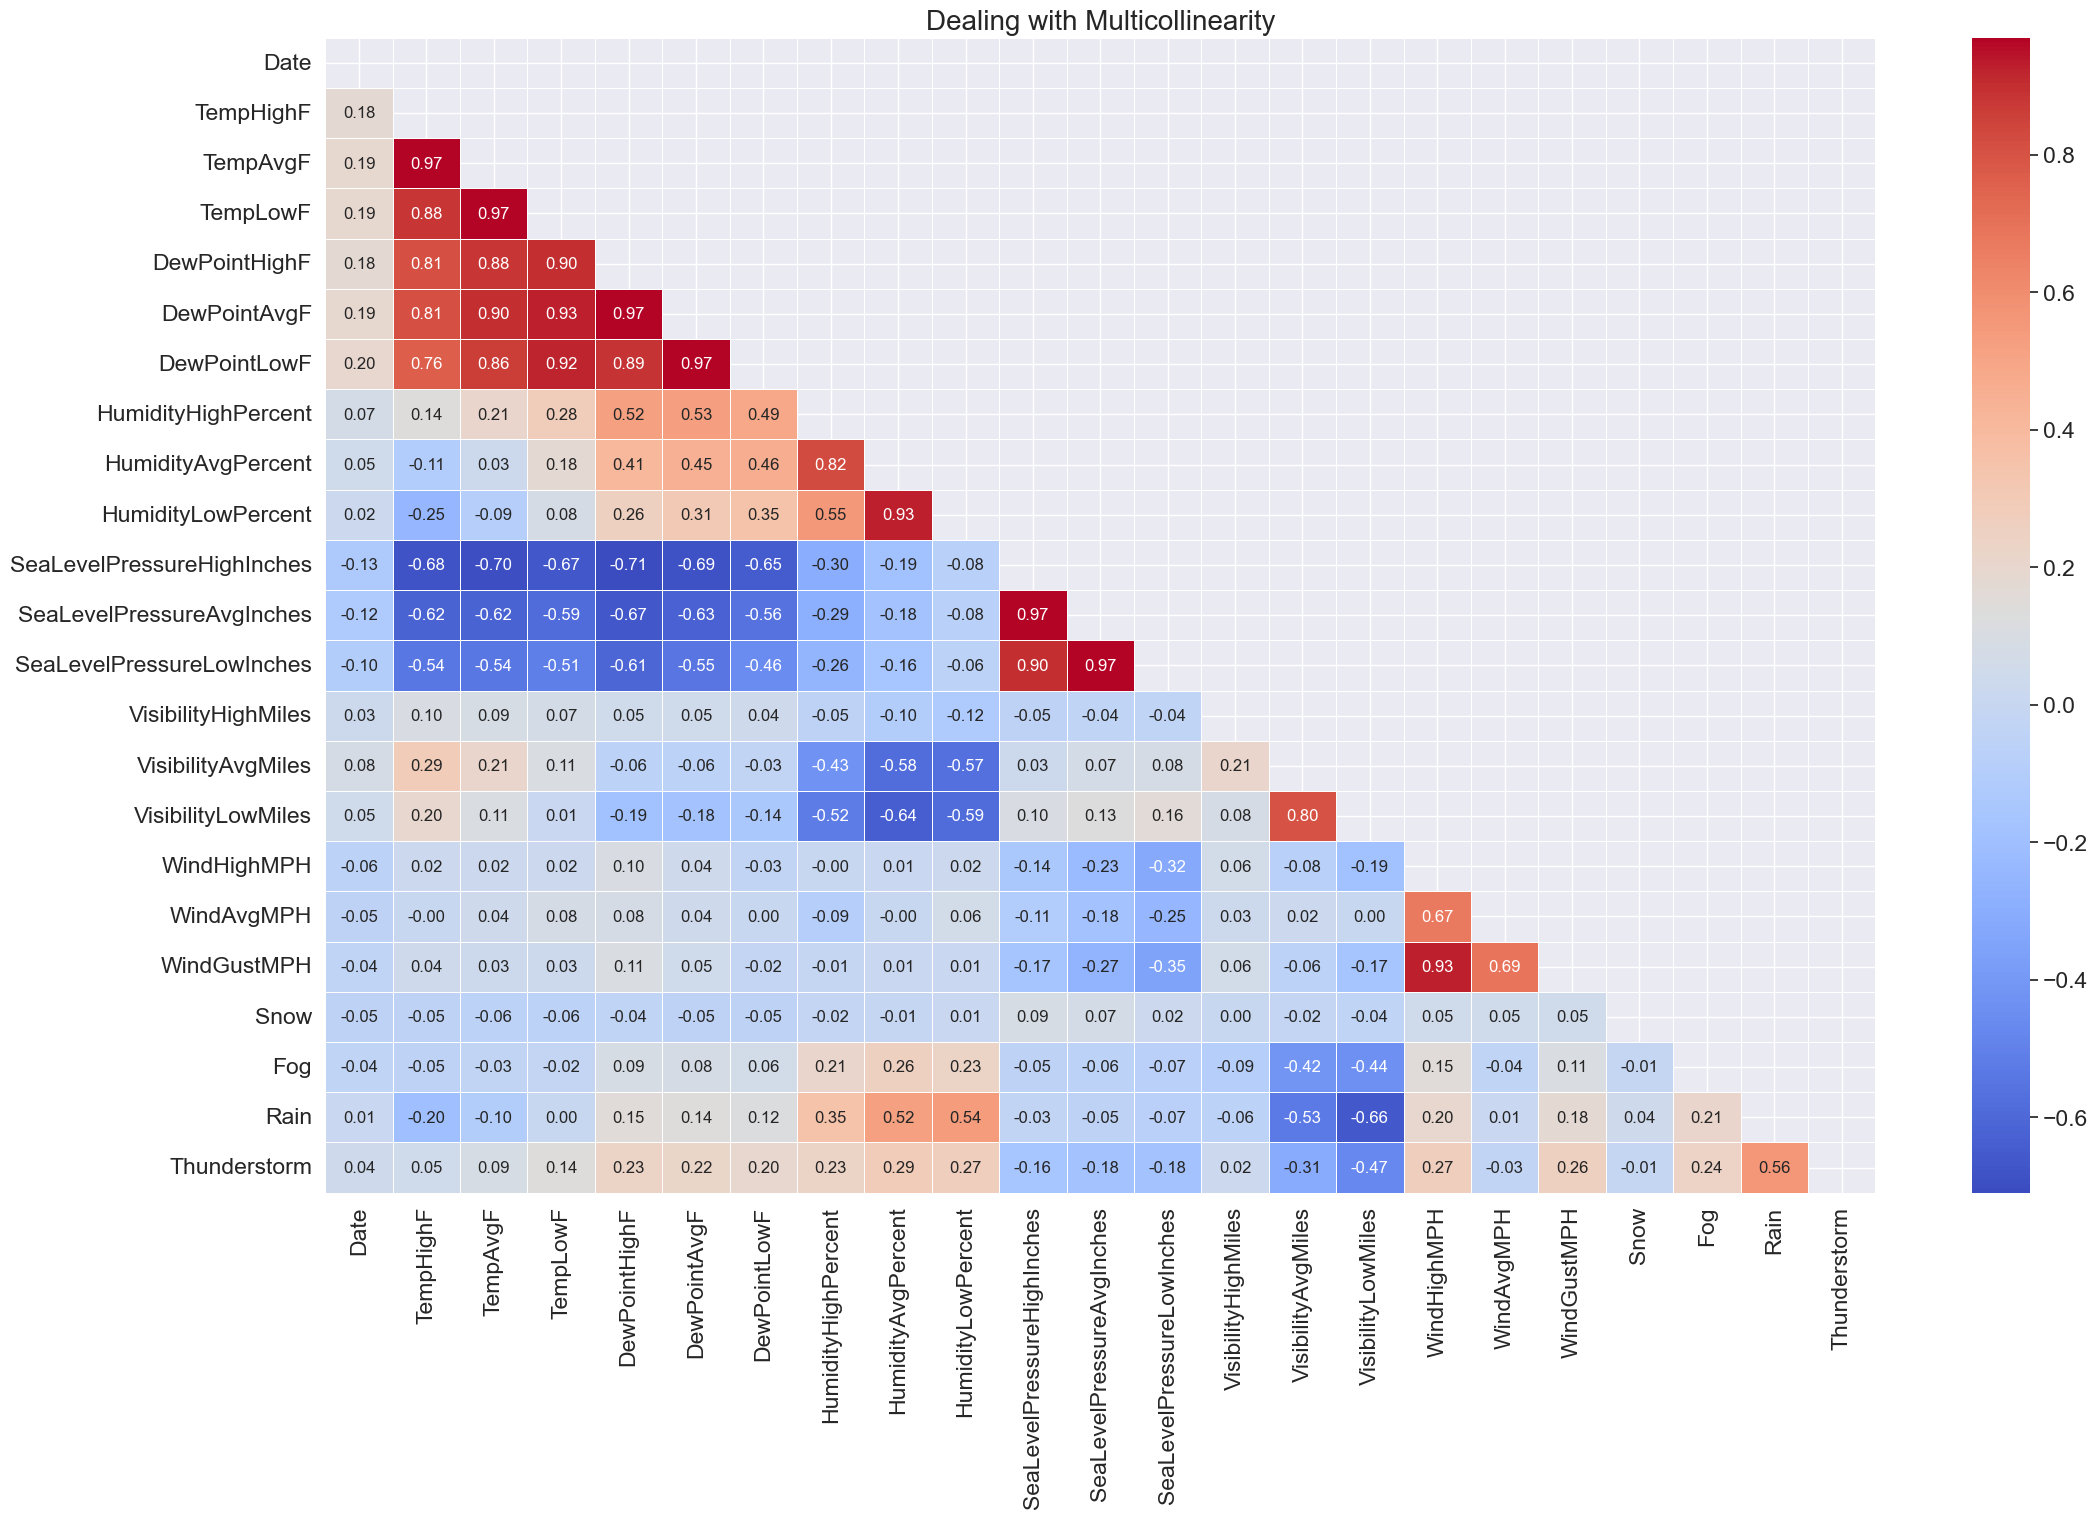

In [454]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [455]:
# templowf, dewpointhighf, DewPointAverageF, DewPointLowf, humidityHighper, Humidityaverageper, sealevelpreassurelow, Visibility average y Low, windgust los dos 

In [456]:
austin_reg = austin_reg.drop(columns= ["TempLowF", "TempHighF","DewPointHighF","DewPointLowF", "HumidityHighPercent", "HumidityLowPercent", "SeaLevelPressureLowInches","SeaLevelPressureHighInches", "VisibilityLowMiles", "VisibilityHighMiles","WindGustMPH","WindHighMPH","HumidityAvgPercent", "SeaLevelPressureAvgInches", "VisibilityAvgMiles"])

In [457]:
austin_reg.head()

,Date,TempAvgF,DewPointAvgF,WindAvgMPH,Snow,Fog,Rain,Thunderstorm
0,735223,60,49.0,4.0,0,0,1,1
1,735224,48,36.0,6.0,0,0,0,0
2,735225,45,27.0,3.0,0,0,0,0
3,735226,46,28.0,4.0,0,0,0,0
4,735227,50,40.0,2.0,0,0,0,0


In [458]:
austin_reg.corrwith(austin_reg["TempAvgF"]).sort_values(ascending=False)

TempAvgF        1.000000
DewPointAvgF    0.895627
Date            0.192518
Thunderstorm    0.094130
WindAvgMPH      0.039365
Fog            -0.032636
Snow           -0.056213
Rain           -0.104820
dtype: float64

In [459]:
X = austin_reg.drop("TempAvgF", axis=1)
y = austin_reg["TempAvgF"]

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [461]:
print(f'100% of our data: {len(austin_reg)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 1317.
70% for training data: 921.
30% for test data: 396.


##### Linear Regression

In [462]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [463]:
predictions_linear = model.predict(X_test)

In [464]:
print(f'30% for test prediction data: {len(predictions_linear)}.')

30% for test prediction data: 396.


In [465]:
r2 = r2_score(y_test, predictions_linear)
RMSE = mean_squared_error(y_test, predictions_linear, squared=False)
MSE = mean_squared_error(y_test, predictions_linear)
MAE = mean_absolute_error(y_test, predictions_linear)

c:\Users\julyj\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [466]:
print("R2 = ", round(r2, 4))
print("RMSE = ", round(RMSE, 4))
print("The value of the metric MSE is ", round(MSE, 4))
print("MAE = ", round(MAE, 4))

R2 =  0.8628
RMSE =  5.2903
The value of the metric MSE is  27.9877
MAE =  4.1409


##### Ridge Regression Model

In [467]:
from sklearn.linear_model import Ridge

In [468]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [469]:
predictions_ridge = ridge.predict(X_test)

In [470]:
r2_ridge = r2_score(y_test, predictions_ridge)
RMSE_ridge = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_ridge = mean_squared_error(y_test, predictions_ridge)
MAE_ridge = mean_absolute_error(y_test, predictions_ridge)

c:\Users\julyj\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [471]:
print("R2 = ", round(r2_ridge, 4))
print("RMSE = ", round(RMSE_ridge, 4))
print("The value of the metric MSE is ", round(MSE_ridge, 4))
print("MAE = ", round(MAE_ridge, 4))

R2 =  0.8626
RMSE =  5.2931
The value of the metric MSE is  28.0169
MAE =  4.1424


##### Lasso Regression

In [472]:
from sklearn.linear_model import Lasso

In [473]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [474]:
predictions_lasso = lasso.predict(X_test)

In [475]:
r2_lasso = r2_score(y_test, predictions_lasso)
RMSE_lasso = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_lasso = mean_squared_error(y_test, predictions_lasso)
MAE_lasso = mean_absolute_error(y_test, predictions_lasso)

c:\Users\julyj\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [476]:
print("R2 = ", round(r2_lasso, 4))
print("RMSE = ", round(RMSE_lasso, 4))
print("The value of the metric MSE is ", round(MSE_lasso, 4))
print("MAE = ", round(MAE_lasso, 4))

R2 =  0.8238
RMSE =  5.9951
The value of the metric MSE is  35.9412
MAE =  4.7347


##### Decision Tree Regression

In [477]:
from sklearn.tree import DecisionTreeRegressor

In [478]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [479]:
predictions_tree = tree.predict(X_test)

In [480]:
r2_tree = r2_score(y_test, predictions_tree)
RMSE_tree = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_tree = mean_squared_error(y_test, predictions_tree)
MAE_tree = mean_absolute_error(y_test, predictions_tree)

c:\Users\julyj\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [481]:
print("R2 = ", round(r2_tree, 4))
print("RMSE = ", round(RMSE_tree, 4))
print("The value of the metric MSE is ", round(MSE_tree, 4))
print("MAE = ", round(MAE_tree, 4))

R2 =  0.8382
RMSE =  5.7446
The value of the metric MSE is  33.0
MAE =  3.9798


##### KNN Regression

In [482]:
from sklearn.neighbors import KNeighborsRegressor

In [483]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [484]:
predictions_knn = knn.predict(X_test)

In [485]:
r2_knn = r2_score(y_test, predictions_knn)
RMSE_knn = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_knn = mean_squared_error(y_test, predictions_knn)
MAE_knn = mean_absolute_error(y_test, predictions_knn)

c:\Users\julyj\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [486]:
print("R2 = ", round(r2_knn, 4))
print("RMSE = ", round(RMSE_knn, 4))
print("The value of the metric MSE is ", round(MSE_knn, 4))
print("MAE = ", round(MAE_knn, 4))

R2 =  0.8978
RMSE =  4.5644
The value of the metric MSE is  20.8336
MAE =  3.3106


##### XGBOOST Regression Model

In [487]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [488]:
import xgboost as xgb

In [489]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [490]:
predictions_xgb = xgbr.predict(X_test)

In [491]:
r2_xgb = r2_score(y_test, predictions_xgb)
RMSE_xgb = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_xgb = mean_squared_error(y_test, predictions_xgb)
MAE_xgb = mean_absolute_error(y_test, predictions_xgb)

c:\Users\julyj\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [492]:
print("R2 = ", round(r2_xgb, 4))
print("RMSE = ", round(RMSE_xgb, 4))
print("The value of the metric MSE is ", round(MSE_xgb, 4))
print("MAE = ", round(MAE_xgb, 4))

R2 =  0.8828
RMSE =  4.8897
The value of the metric MSE is  23.9087
MAE =  3.7408


In [493]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2, r2_ridge, r2_lasso, r2_tree, r2_knn, r2_xgb],
    'RMSE': [RMSE, RMSE_ridge, RMSE_lasso, RMSE_tree, RMSE_knn, RMSE_xgb],
    'MSE': [MSE, MSE_ridge, MSE_lasso, MSE_tree, MSE_knn, MSE_xgb],
    'MAE': [MAE, MAE_ridge, MAE_lasso, MAE_tree, MAE_knn, MAE_xgb]
}

In [494]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,0.862755,0.862612,0.823753,0.838176,0.897837,0.882757
RMSE,5.290338,5.293100,5.995094,5.744563,4.564388,4.889653
MSE,27.987671,28.016904,35.941156,33.000000,20.833636,23.908702
MAE,4.140912,4.142394,4.734696,3.979798,3.310606,3.740788
